In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot  as plt 
import scipy.stats as sts
from pycaret.classification import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.

# Dataset escolhido 
Animal crossings new hhorizons jogo de nintendo switch 
# por que? 
e um dataset bem documentado e com notas altas e e com muitas submissões além dde varisas possibilidades
# objetivos
ajudar o jogadores e maxiimazaram sua gameplay 

In [43]:
df = pd.read_csv('C:/Animal-crossing-performace/dataset-AH/villagers.csv')

In [3]:
df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


a coluna personalidade sera a coluna alvo da da prediçao com machine learnig

In [4]:
df.isnull().sum()

Name               0
Species            0
Gender             0
Personality        0
Hobby              0
Birthday           0
Catchphrase        0
Favorite Song      0
Style 1            0
Style 2            0
Color 1            0
Color 2            0
Wallpaper          0
Flooring           0
Furniture List     0
Filename           0
Unique Entry ID    0
dtype: int64

In [5]:

duplicados = df['Unique Entry ID'].duplicated().sum()
print(f'Número de IDs duplicados: {duplicados}')


if duplicados > 0:
    print("\nLinhas com IDs duplicados:")
    print(df[df['Unique Entry ID'].duplicated(keep=False)])

Número de IDs duplicados: 0


sem intes duplicados nem nulos 

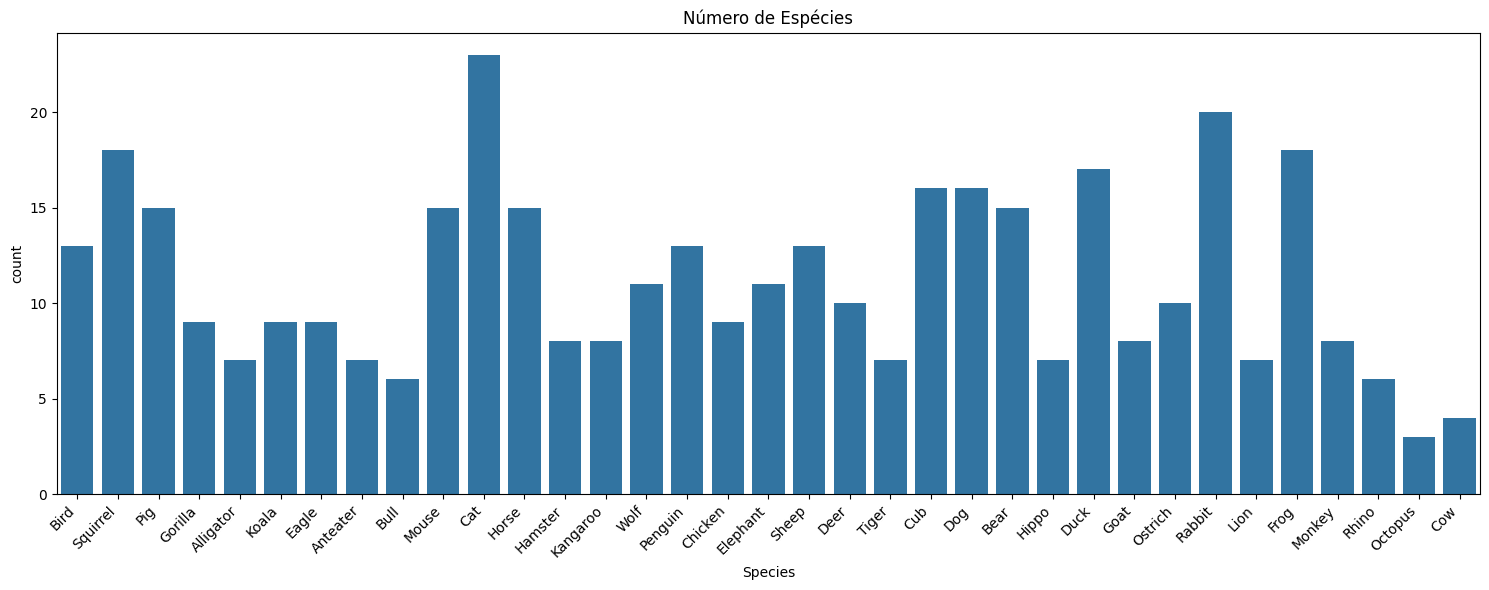

In [6]:

plt.figure(figsize=(15, 6))


plt.title("Número de Espécies")
sns.countplot(data=df, x='Species')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()

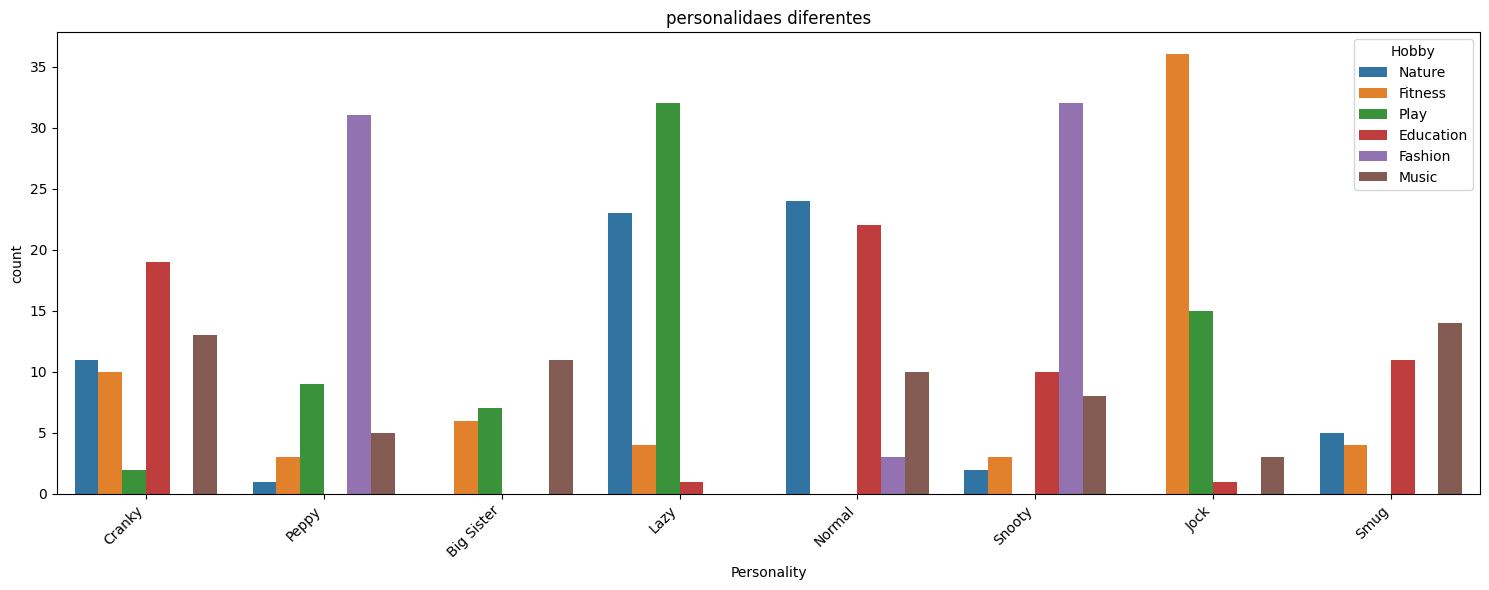

In [7]:

plt.figure(figsize=(15, 6))


plt.title("personalidaes diferentes")
sns.countplot(data=df, x='Personality',hue='Hobby')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()

Hispotese de que os hobby afetam na personalidade 

para verificar a se a especie afeta farei um teste estatistico por conta alto numero de especies

Contingency table shape: (8, 35)
Exemplo (primeiras 5 linhas e colunas):
Species      Alligator  Anteater  Bear  Bird  Bull
Personality                                       
Big Sister           0         0     3     0     0
Cranky               1         1     5     1     3
Jock                 2         1     1     4     1
Lazy                 2         0     1     2     2
Normal               1         1     1     1     0

Chi2 = 212.9726
p-value = 8.7680e-01
Degrees of freedom = 238
Cramér's V = 0.2789 (0 = sem associação, 1 = associação perfeita)


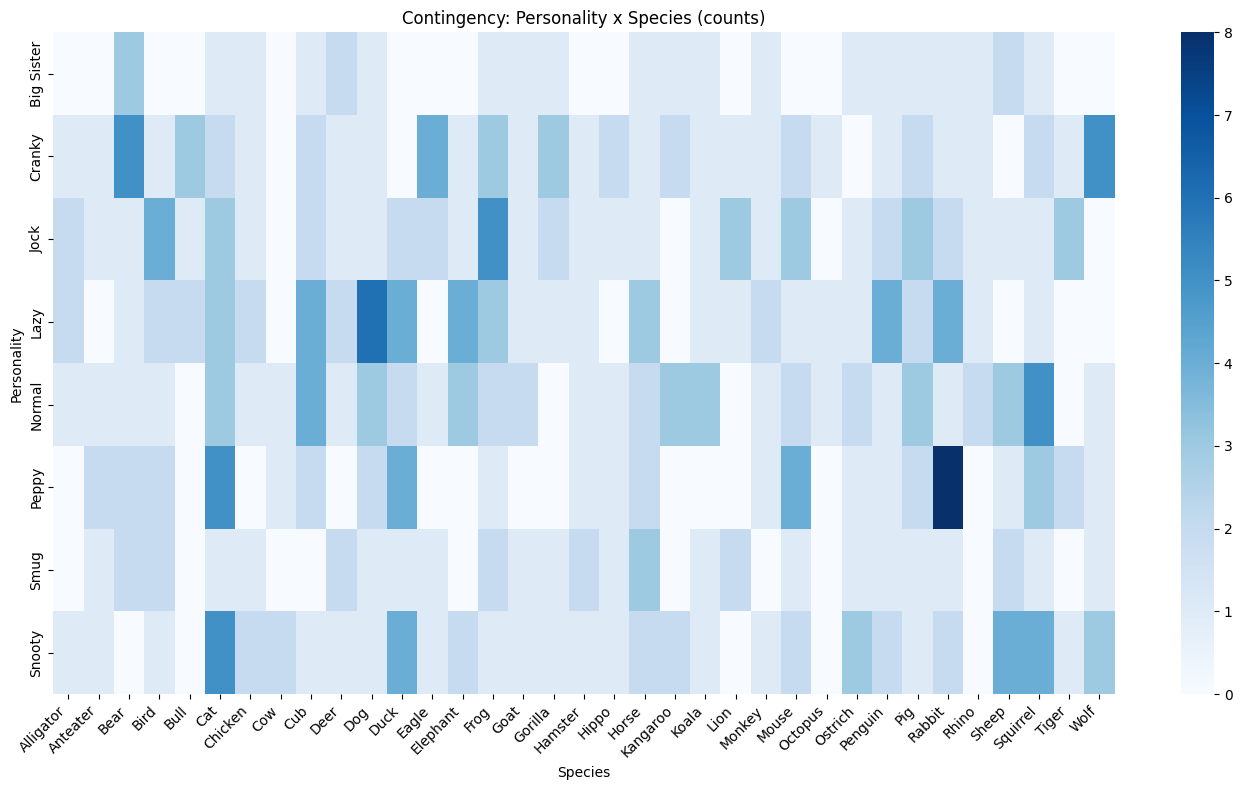

In [ ]:
contingency = pd.crosstab(df['Personality'], df['Species'])


print(f"Contingency table shape: {contingency.shape}")
print("Exemplo (primeiras 5 linhas e colunas):")
print(contingency.iloc[:5, :5])

chi2, p_chi, dof, expected = sts.chi2_contingency(contingency)
print(f"\nChi2 = {chi2:.4f}")
print(f"p-value = {p_chi:.4e}")
print(f"Degrees of freedom = {dof}")


n = contingency.sum().sum()
phi2 = chi2 / n
r, k = contingency.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))
print(f"Cramér's V = {cramers_v:.4f} (0 = sem associação, 1 = associação perfeita)")

plt.figure(figsize=(14, 8))
sns.heatmap(contingency, cmap='Blues', cbar=True)
plt.title("Contingency: Personality x Species (counts)")
plt.xlabel('Species')
plt.ylabel('Personality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

as duas variaveis são independentes

 Top 5 músicas favoritas dos villagers:

Favorite Song
Forest Life      15
K.K. Soul        12
K.K. Cruisin'    11
K.K. Stroll      10
Neapolitan        9
Name: count, dtype: int64


C:\Users\rozan\AppData\Local\Temp\ipykernel_14752\3697342303.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


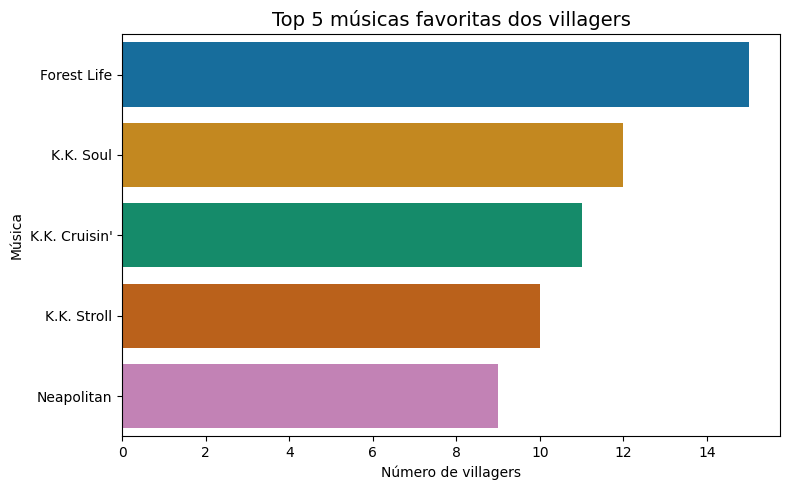

In [22]:
top_musicas = df["Favorite Song"].value_counts().head(5)


print(" Top 5 músicas favoritas dos villagers:\n")
print(top_musicas)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_musicas.values,
    y=top_musicas.index,
    palette="colorblind"  
)

plt.title("Top 5 músicas favoritas dos villagers", fontsize=14)
plt.xlabel("Número de villagers")
plt.ylabel("Música")
plt.tight_layout()
plt.show()

estilos

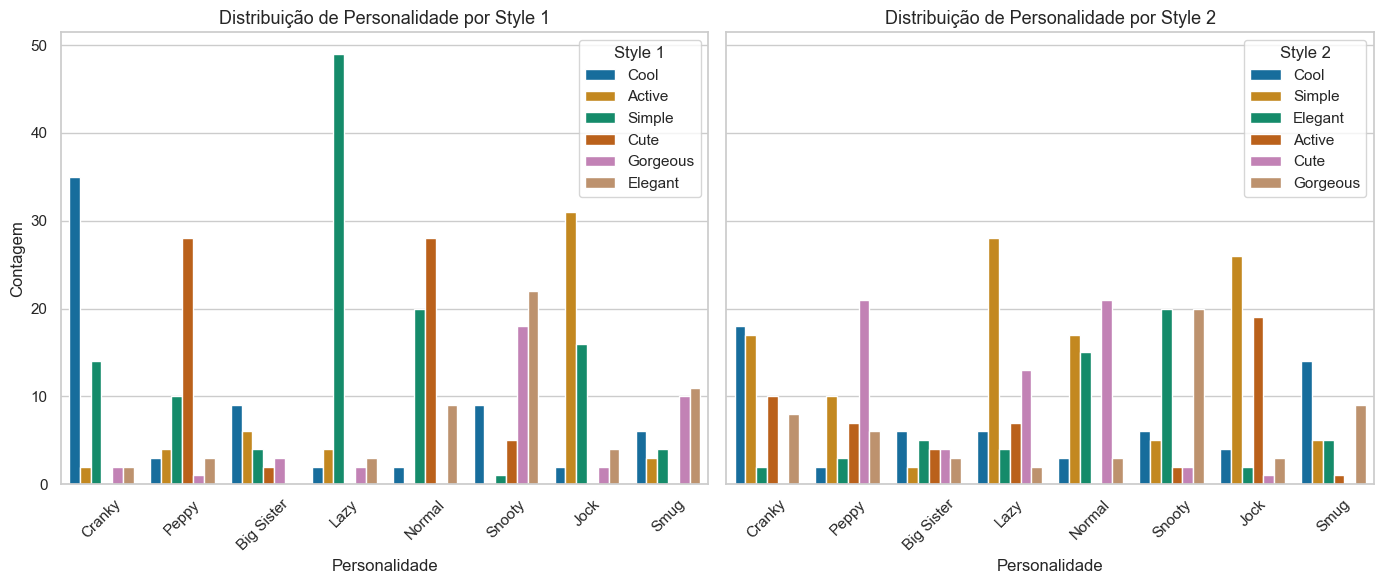

In [23]:
sns.set_theme(style="whitegrid", palette="colorblind")


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


sns.countplot(
    data=df,
    x="Personality",
    hue="Style 1",
    ax=axes[0]
)
axes[0].set_title("Distribuição de Personalidade por Style 1", fontsize=13)
axes[0].set_xlabel("Personalidade")
axes[0].set_ylabel("Contagem")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(
    data=df,
    x="Personality",
    hue="Style 2",
    ax=axes[1]
)
axes[1].set_title("Distribuição de Personalidade por Style 2", fontsize=13)
axes[1].set_xlabel("Personalidade")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## treinamento dos medelos 

In [45]:
#cols_drop = ["Furniture List", "Filename", "Unique Entry ID", "Birthday", "Favorite Song"]

#df.drop(columns=cols_drop,inplace=True)

exp=ClassificationExperiment()

x=df.drop(columns="Personality")
y=df["Personality"]

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

x_encoded = encoder.fit_transform(x.select_dtypes(include=['object']))

encoded_cols = encoder.get_feature_names_out(x.select_dtypes(include=['object']).columns)
x_encoded_df = pd.DataFrame(x_encoded, columns=encoded_cols, index=x.index)

df_train = pd.concat([x_encoded_df, y], axis=1)


exp.setup(data=df_train,target="Personality",  session_id=123)


best_model = exp.compare_models()

print(best_model)

,Description,Value
0,Session id,123
1,Target,Personality
2,Target type,Multiclass
3,Target mapping,"Big Sister: 0, Cranky: 1, Jock: 2, Lazy: 3, Normal: 4, Peppy: 5, Smug: 6, Snooty: 7"
4,Original data shape,"(391, 1145)"
5,Transformed data shape,"(391, 1145)"
6,Transformed train set shape,"(273, 1145)"
7,Transformed test set shape,"(118, 1145)"
8,Numeric features,1144
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7327,0.0000,0.7327,0.7421,0.7080,0.6898,0.6981,1.0610
et,Extra Trees Classifier,0.7288,0.9593,0.7288,0.7371,0.7043,0.6855,0.6941,0.1790
rf,Random Forest Classifier,0.7144,0.9544,0.7144,0.7129,0.6883,0.6682,0.6764,0.1890
lightgbm,Light Gradient Boosting Machine,0.7103,0.9441,0.7103,0.7245,0.6970,0.6646,0.6704,0.7250
knn,K Neighbors Classifier,0.6743,0.9021,0.6743,0.6669,0.6440,0.6220,0.6318,0.6630
svm,SVM - Linear Kernel,0.6704,0.0000,0.6704,0.7154,0.6487,0.6186,0.6309,0.1050
gbc,Gradient Boosting Classifier,0.6700,0.0000,0.6700,0.6597,0.6369,0.6162,0.6253,0.8670
ridge,Ridge Classifier,0.6593,0.0000,0.6593,0.6831,0.6400,0.6048,0.6150,0.1050
dt,Decision Tree Classifier,0.6332,0.7896,0.6332,0.6537,0.6236,0.5765,0.5826,0.1250
lda,Linear Discriminant Analysis,0.5460,0.0000,0.5460,0.5562,0.5161,0.4702,0.4832,0.1170


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


melhor resultado foi a regressão logistica depois vou corrigir o erro do pycaret que esta zerando algumas curvas AUC